In [31]:
import pandas as pd
import numpy as np
# import openpyxl
import matplotlib as plot
import seaborn as sns


In [32]:
path = "..\\Data\\KPMG_VI_New_raw_data_update_final.xlsx"
NewCustomerList0 = pd.read_excel(path, sheet_name="NewCustomerList")
Transactions0 = pd.read_excel(path, sheet_name="Transactions")
CustomerDemographic0 = pd.read_excel(path, sheet_name="CustomerDemographic")
CustomerAddress0 = pd.read_excel(path, sheet_name="CustomerAddress")

# This is to check the basic info for each sheet
print(NewCustomerList0.head(5))
print("======================")
print(Transactions0.head(5))
print("======================")
print(CustomerDemographic0.head(5))
print("======================")
print(CustomerAddress0.head(5))

C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\824455612.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic0 = pd.read_excel(path, sheet_name="CustomerDemographic")


  first_name   last_name  gender  past_3_years_bike_related_purchases  \
0    Marinna    Kauschke  Female                                   21   
1       Olia   O' Mullan  Female                                   77   
2   Brigitte    Whellams  Female                                   67   
3        Ivy        Farr  Female                                   56   
4   Beverlee  Ungerechts  Female                                   49   

         DOB                       job_title job_industry_category  \
0 1973-03-15                 Sales Associate    Financial Services   
1 1973-03-24               Account Executive                Health   
2 1973-05-09  Payment Adjustment Coordinator                   NaN   
3 1973-07-03             Office Assistant IV                    IT   
4 1973-10-03                  Civil Engineer         Manufacturing   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0  Affluent Customer                  N      Yes  ...    VIC  Aus

C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\824455612.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic0 = pd.read_excel(path, sheet_name="CustomerDemographic")


  first_name   last_name  gender  past_3_years_bike_related_purchases  \
0    Marinna    Kauschke  Female                                   21   
1       Olia   O' Mullan  Female                                   77   
2   Brigitte    Whellams  Female                                   67   
3        Ivy        Farr  Female                                   56   
4   Beverlee  Ungerechts  Female                                   49   

         DOB                       job_title job_industry_category  \
0 1973-03-15                 Sales Associate    Financial Services   
1 1973-03-24               Account Executive                Health   
2 1973-05-09  Payment Adjustment Coordinator                   NaN   
3 1973-07-03             Office Assistant IV                    IT   
4 1973-10-03                  Civil Engineer         Manufacturing   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0  Affluent Customer                  N      Yes  ...    VIC  Aus

In [33]:
NewCustomerList0.info()
print("======================")
Transactions0.info()
print("======================")
CustomerDemographic0.info()
print("======================")
CustomerAddress0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [34]:
NewCustomerList = NewCustomerList0.dropna()
Transactions = Transactions0.dropna()
CustomerDemographic = CustomerDemographic0.dropna()
CustomerAddress = CustomerAddress0.dropna()
#===========================================
NewCustomerList.info()
Transactions.info()
CustomerDemographic.info()
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 981
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

In [35]:
print(Transactions.columns)
print(CustomerDemographic.columns)
print(CustomerAddress.columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'Profit', 'product_first_sold_date'],
      dtype='object')
Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')
Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')
Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'Profit', 'product_first_sold_date'],
      dtype='object')
Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_y

In [36]:
CustomerDemographic = CustomerDemographic.drop(CustomerDemographic[CustomerDemographic.deceased_indicator=="Y"].index)

In [37]:
infoCustomerDemo = CustomerDemographic[["customer_id", "gender","Age","past_3_years_bike_related_purchases", "job_industry_category", "wealth_segment", "owns_car", "tenure"]]
infoTransactions = Transactions[["customer_id", "product_id", "transaction_date", "online_order", "order_status", "product_line", "product_class", "product_size", "Profit", "product_first_sold_date"]]
infoAddress = CustomerAddress[["state", "property_valuation"]]
cust_demo_address = pd.merge(infoCustomerDemo, infoAddress, left_index=True, right_index=True)
# combined_data2 = pd.merge(combined_data1, infoAddress, left_index=True, right_index=True)
cust_demo_address.dropna()
infoTransactions.dropna()
# combined_data1.info()

,customer_id,product_id,transaction_date,online_order,order_status,product_line,product_class,product_size,Profit,product_first_sold_date
0,2950,2,2017-02-25,0.0,Approved,Standard,medium,medium,17.87,2012-12-02
1,3120,3,2017-05-21,1.0,Approved,Standard,medium,large,1702.55,2014-03-03
2,402,37,2017-10-16,0.0,Approved,Standard,low,medium,1544.61,1999-07-20
3,3135,88,2017-08-31,0.0,Approved,Standard,medium,medium,817.36,1998-12-16
4,787,78,2017-10-01,1.0,Approved,Standard,medium,large,1055.82,2015-08-10
...,...,...,...,...,...,...,...,...,...,...
19995,1018,51,2017-06-24,1.0,Approved,Standard,high,medium,802.26,2003-07-21
19996,127,41,2017-11-09,1.0,Approved,Road,medium,medium,104.24,1997-05-10
19997,2284,87,2017-04-14,1.0,Approved,Standard,medium,medium,1592.19,2010-08-20
19998,2764,6,2017-07-03,0.0,Approved,Standard,high,medium,91.15,2004-08-17


,customer_id,product_id,transaction_date,online_order,order_status,product_line,product_class,product_size,Profit,product_first_sold_date
0,2950,2,2017-02-25,0.0,Approved,Standard,medium,medium,17.87,2012-12-02
1,3120,3,2017-05-21,1.0,Approved,Standard,medium,large,1702.55,2014-03-03
2,402,37,2017-10-16,0.0,Approved,Standard,low,medium,1544.61,1999-07-20
3,3135,88,2017-08-31,0.0,Approved,Standard,medium,medium,817.36,1998-12-16
4,787,78,2017-10-01,1.0,Approved,Standard,medium,large,1055.82,2015-08-10
...,...,...,...,...,...,...,...,...,...,...
19995,1018,51,2017-06-24,1.0,Approved,Standard,high,medium,802.26,2003-07-21
19996,127,41,2017-11-09,1.0,Approved,Road,medium,medium,104.24,1997-05-10
19997,2284,87,2017-04-14,1.0,Approved,Standard,medium,medium,1592.19,2010-08-20
19998,2764,6,2017-07-03,0.0,Approved,Standard,high,medium,91.15,2004-08-17


In [38]:
cust_demo_address["gender"].replace("Female", 1,inplace=True)
cust_demo_address["gender"].replace("Male", 0,inplace=True)
cust_demo_address["owns_car"].replace("Yes", 1,inplace=True)
cust_demo_address["owns_car"].replace("No", 0,inplace=True)
cust_demo_address["owns_car"] = pd.to_numeric(cust_demo_address["owns_car"], errors='coerce')
cust_demo_address["gender"] = pd.to_numeric(cust_demo_address["gender"], errors='coerce')
cust_demo_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2777 entries, 0 to 3911
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2777 non-null   int64  
 1   gender                               2777 non-null   int64  
 2   Age                                  2777 non-null   float64
 3   past_3_years_bike_related_purchases  2777 non-null   int64  
 4   job_industry_category                2777 non-null   object 
 5   wealth_segment                       2777 non-null   object 
 6   owns_car                             2777 non-null   int64  
 7   tenure                               2777 non-null   float64
 8   state                                2777 non-null   object 
 9   property_valuation                   2777 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 238.6+ KB
<class 'pandas.core.frame.DataFrame'>

In [39]:
infoTransactions['online_order'].replace('TRUE', 1, inplace=True)
infoTransactions['online_order'].replace('FALSE', 0, inplace=True)
infoTransactions['order_status'].replace('Approved', 1, inplace=True)
infoTransactions['order_status'].replace('Cancelled', 0, inplace=True)
# infoTransactions.info()
infoTransactions['order_status'].info

C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['online_order'].replace('TRUE', 1, inplace=True)
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['online_order'].replace('FALSE', 0, inplace=True)
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<bound method Series.info of 0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: order_status, Length: 19445, dtype: int64>

C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['online_order'].replace('TRUE', 1, inplace=True)
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['online_order'].replace('FALSE', 0, inplace=True)
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\1416975224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<bound method Series.info of 0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: order_status, Length: 19445, dtype: int64>

In [40]:
obj_column = infoTransactions.select_dtypes('object').columns
print(obj_column)
for obj in obj_column :
    print(f'{obj}:{infoTransactions[obj].unique()}')

Index(['product_line', 'product_class', 'product_size'], dtype='object')
product_line:['Standard' 'Road' 'Mountain' 'Touring']
product_class:['medium' 'low' 'high']
product_size:['medium' 'large' 'small']
Index(['product_line', 'product_class', 'product_size'], dtype='object')
product_line:['Standard' 'Road' 'Mountain' 'Touring']
product_class:['medium' 'low' 'high']
product_size:['medium' 'large' 'small']


In [41]:
print(type(infoTransactions))
infoTransactions.shape
infoTransactions.info

<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.info of        customer_id  product_id transaction_date  online_order  order_status  \
0             2950           2       2017-02-25           0.0             1   
1             3120           3       2017-05-21           1.0             1   
2              402          37       2017-10-16           0.0             1   
3             3135          88       2017-08-31           0.0             1   
4              787          78       2017-10-01           1.0             1   
...            ...         ...              ...           ...           ...   
19995         1018          51       2017-06-24           1.0             1   
19996          127          41       2017-11-09           1.0             1   
19997         2284          87       2017-04-14           1.0             1   
19998         2764           6       2017-07-03           0.0             1   
19999         1144          11       2017-09-22           1.0             1   

      product_line 

<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.info of        customer_id  product_id transaction_date  online_order  order_status  \
0             2950           2       2017-02-25           0.0             1   
1             3120           3       2017-05-21           1.0             1   
2              402          37       2017-10-16           0.0             1   
3             3135          88       2017-08-31           0.0             1   
4              787          78       2017-10-01           1.0             1   
...            ...         ...              ...           ...           ...   
19995         1018          51       2017-06-24           1.0             1   
19996          127          41       2017-11-09           1.0             1   
19997         2284          87       2017-04-14           1.0             1   
19998         2764           6       2017-07-03           0.0             1   
19999         1144          11       2017-09-22           1.0             1   

      product_line 

In [42]:
last_day = infoTransactions['transaction_date'].max()
print(infoTransactions["transaction_date"].describe())
infoTransactions['recent_days'] = last_day - infoTransactions['transaction_date']
infoTransactions['recent_days'].describe()
infoTransactions.head()

count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object


C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\3117959583.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(infoTransactions["transaction_date"].describe())
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\3117959583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['recent_days'] = last_day - infoTransactions['transaction_date']


,customer_id,product_id,transaction_date,online_order,order_status,product_line,product_class,product_size,Profit,product_first_sold_date,recent_days
0,2950,2,2017-02-25,0.0,1,Standard,medium,medium,17.87,2012-12-02,308 days
1,3120,3,2017-05-21,1.0,1,Standard,medium,large,1702.55,2014-03-03,223 days
2,402,37,2017-10-16,0.0,1,Standard,low,medium,1544.61,1999-07-20,75 days
3,3135,88,2017-08-31,0.0,1,Standard,medium,medium,817.36,1998-12-16,121 days
4,787,78,2017-10-01,1.0,1,Standard,medium,large,1055.82,2015-08-10,90 days


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object


C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\3117959583.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(infoTransactions["transaction_date"].describe())
C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\3117959583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTransactions['recent_days'] = last_day - infoTransactions['transaction_date']


,customer_id,product_id,transaction_date,online_order,order_status,product_line,product_class,product_size,Profit,product_first_sold_date,recent_days
0,2950,2,2017-02-25,0.0,1,Standard,medium,medium,17.87,2012-12-02,308 days
1,3120,3,2017-05-21,1.0,1,Standard,medium,large,1702.55,2014-03-03,223 days
2,402,37,2017-10-16,0.0,1,Standard,low,medium,1544.61,1999-07-20,75 days
3,3135,88,2017-08-31,0.0,1,Standard,medium,medium,817.36,1998-12-16,121 days
4,787,78,2017-10-01,1.0,1,Standard,medium,large,1055.82,2015-08-10,90 days


In [43]:
infoTransactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   customer_id              19445 non-null  int64          
 1   product_id               19445 non-null  int64          
 2   transaction_date         19445 non-null  datetime64[ns] 
 3   online_order             19445 non-null  float64        
 4   order_status             19445 non-null  int64          
 5   product_line             19445 non-null  object         
 6   product_class            19445 non-null  object         
 7   product_size             19445 non-null  object         
 8   Profit                   19445 non-null  float64        
 9   product_first_sold_date  19445 non-null  datetime64[ns] 
 10  recent_days              19445 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(3), timedelta64[ns](1)
memory

In [44]:
# infoTransactions['recent_days'] /= np.timedelta64(1, 'D')
rfm = infoTransactions.groupby('customer_id').agg({
    'recent_days': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'Profit': lambda x: x.sum()
})
rfm.rename(columns= {"recent_days": "recency", "Profit": "monetary",'customer_id': "frequency"}, inplace=True)
rfm.head(10)

,recency,frequency,monetary
customer_id,,,
1,7 days,11,3018.09
2,128 days,3,2226.26
3,102 days,7,3290.21
4,195 days,2,220.57
5,16 days,6,2394.94
6,64 days,5,3946.55
7,253 days,3,220.11
8,22 days,9,5364.39
9,78 days,6,2353.11


,recency,frequency,monetary
customer_id,,,
1,7 days,11,3018.09
2,128 days,3,2226.26
3,102 days,7,3290.21
4,195 days,2,220.57
5,16 days,6,2394.94
6,64 days,5,3946.55
7,253 days,3,220.11
8,22 days,9,5364.39
9,78 days,6,2353.11


In [45]:
rfm.quantile(q = [0.25,0.5,0.75])

C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\2558617404.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rfm.quantile(q = [0.25,0.5,0.75])


,frequency,monetary
0.25,4.0,1797.43
0.50,5.0,2798.99
0.75,7.0,4122.44


C:\Users\M1820\AppData\Local\Temp\ipykernel_2936\2558617404.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rfm.quantile(q = [0.25,0.5,0.75])


,frequency,monetary
0.25,4.0,1797.43
0.50,5.0,2798.99
0.75,7.0,4122.44


add a new column to illustrate the rfm_grade, and find the quantile

In [46]:
r_grade=[]
for item in rfm.recency:
    # print(rfm.recency.quantile([0.25]).values[0])
    # print(type(rfm.recency.quantile([0.25]).values[0]))
    if item <= rfm.recency.quantile([0.25]).values[0]:
        r_grade.append(1)
    elif item <= rfm.recency.quantile([0.5]).values[0]:
        r_grade.append(2)
    elif item <= rfm.recency.quantile([0.75]).values[0]:
        r_grade.append(3)
    else:
        r_grade.append(4)
rfm["r_grade"] = r_grade

In [47]:
f_grade=[]
for item in rfm.frequency:
    if item <= rfm.frequency.quantile([0.25]).values[0]:
        f_grade.append(4)
    elif item <= rfm.frequency.quantile([0.5]).values[0]:
        f_grade.append(3)
    elif item <= rfm.frequency.quantile([0.75]).values[0]:
        f_grade.append(2)
    else:
        f_grade.append(1)
rfm["f_grade"] = f_grade

In [48]:
m_grade=[]
for item in rfm.monetary:
    if item <= rfm.monetary.quantile([0.25]).values[0]:
        m_grade.append(1)
    elif item <= rfm.monetary.quantile([0.5]).values[0]:
        m_grade.append(2)
    elif item <= rfm.monetary.quantile([0.75]).values[0]:
        m_grade.append(3)
    else:
        m_grade.append(4)
rfm["m_grade"] = m_grade

In [49]:
rfm['rfm_grade'] = 100 * rfm['r_grade'] + 10 * rfm['f_grade'] + rfm['m_grade']

In [50]:
print(rfm)

             recency  frequency     monetary  r_grade  f_grade  m_grade  \
customer_id                                                               
1             7 days         11  3018.090000        1        1        3   
2           128 days          3  2226.260000        4        4        2   
3           102 days          7  3290.210000        4        2        3   
4           195 days          2   220.570000        4        4        1   
5            16 days          6  2394.940000        1        2        2   
...              ...        ...          ...      ...      ...      ...   
3497         52 days          3  1648.320000        3        4        1   
3498        127 days          6  3147.330000        4        2        3   
3499         51 days          7  4955.250000        3        2        4   
3500        144 days          6  1785.860000        4        2        1   
5034         84 days          3   269.484972        3        4        1   

             rfm_grade  

In [51]:
# print(rfm.rfm_grade.quantile([0.25]).values[0])
customer_segment=[]
for item in rfm.rfm_grade:
    if item <= rfm.rfm_grade.quantile([0.25]).values[0]:
        customer_segment.append("A")
    elif item <= rfm.rfm_grade.quantile([0.5]).values[0]:
        customer_segment.append("B")
    elif item <= rfm.rfm_grade.quantile([0.75]).values[0]:
        customer_segment.append("C")
    else:
        customer_segment.append("D")
rfm["customer_segment"] = customer_segment
rfm

,recency,frequency,monetary,r_grade,f_grade,m_grade,rfm_grade,customer_segment
customer_id,,,,,,,,
1,7 days,11,3018.090000,1,1,3,113,A
2,128 days,3,2226.260000,4,4,2,442,D
3,102 days,7,3290.210000,4,2,3,423,D
4,195 days,2,220.570000,4,4,1,441,D
5,16 days,6,2394.940000,1,2,2,122,A
...,...,...,...,...,...,...,...,...
3497,52 days,3,1648.320000,3,4,1,341,C
3498,127 days,6,3147.330000,4,2,3,423,D
3499,51 days,7,4955.250000,3,2,4,324,C


,recency,frequency,monetary,r_grade,f_grade,m_grade,rfm_grade,customer_segment
customer_id,,,,,,,,
1,7 days,11,3018.090000,1,1,3,113,A
2,128 days,3,2226.260000,4,4,2,442,D
3,102 days,7,3290.210000,4,2,3,423,D
4,195 days,2,220.570000,4,4,1,441,D
5,16 days,6,2394.940000,1,2,2,122,A
...,...,...,...,...,...,...,...,...
3497,52 days,3,1648.320000,3,4,1,341,C
3498,127 days,6,3147.330000,4,2,3,423,D
3499,51 days,7,4955.250000,3,2,4,324,C


In [52]:
cust_demo_address.columns

Index(['customer_id', 'gender', 'Age', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation'],
      dtype='object')

Index(['customer_id', 'gender', 'Age', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation'],
      dtype='object')

In [53]:
cust_demo_address['age_level'] = ((round(cust_demo_address['Age'] / 10)) * 10).astype(int)
cust_demo_address.head()

,customer_id,gender,Age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age_level
0,720,0,91.0,67,Retail,Affluent Customer,0,6.0,NSW,10,90
1,1092,1,87.0,56,Retail,Mass Customer,0,5.0,NSW,10,90
3,2413,0,79.0,27,Manufacturing,High Net Worth,1,17.0,NSW,4,80
4,658,0,78.0,38,Manufacturing,Affluent Customer,1,8.0,VIC,9,80
5,1243,0,69.0,73,Retail,Mass Customer,0,8.0,NSW,9,70


,customer_id,gender,Age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age_level
0,720,0,91.0,67,Retail,Affluent Customer,0,6.0,NSW,10,90
1,1092,1,87.0,56,Retail,Mass Customer,0,5.0,NSW,10,90
3,2413,0,79.0,27,Manufacturing,High Net Worth,1,17.0,NSW,4,80
4,658,0,78.0,38,Manufacturing,Affluent Customer,1,8.0,VIC,9,80
5,1243,0,69.0,73,Retail,Mass Customer,0,8.0,NSW,9,70


<AxesSubplot: xlabel='job_industry_category'>

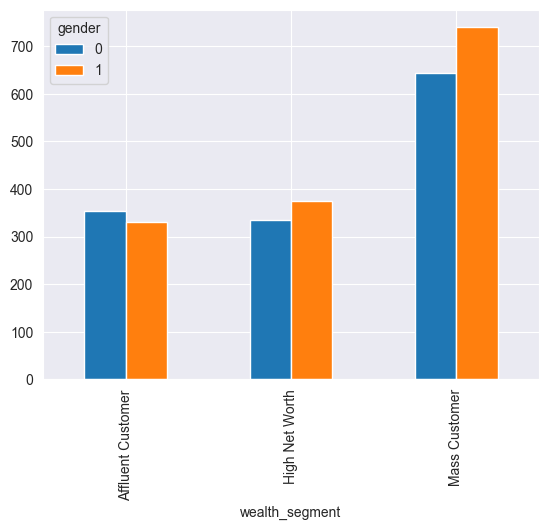

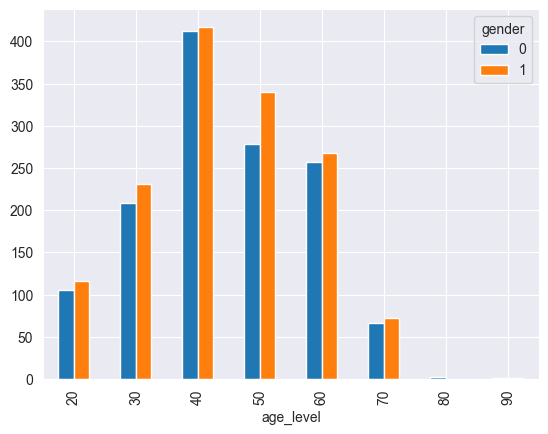

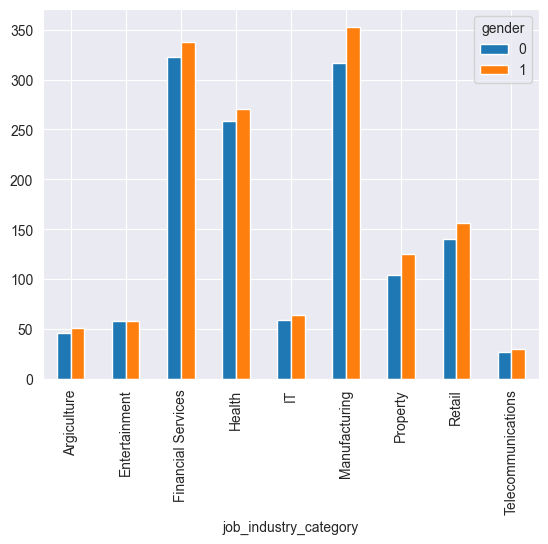

<AxesSubplot: xlabel='job_industry_category'>

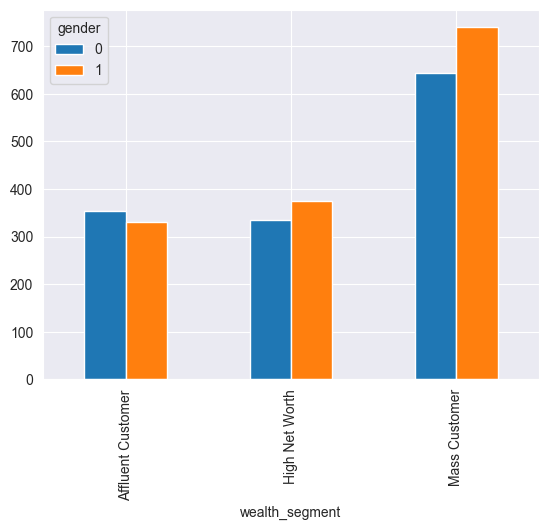

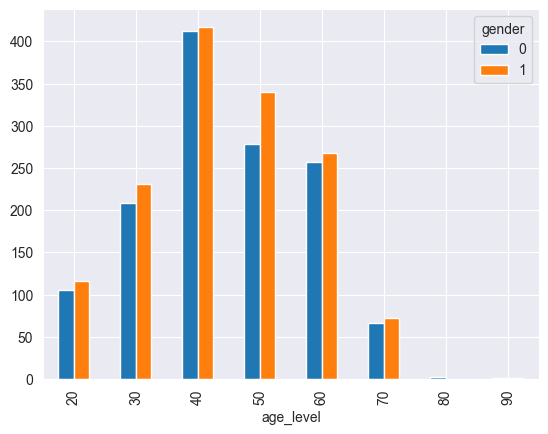

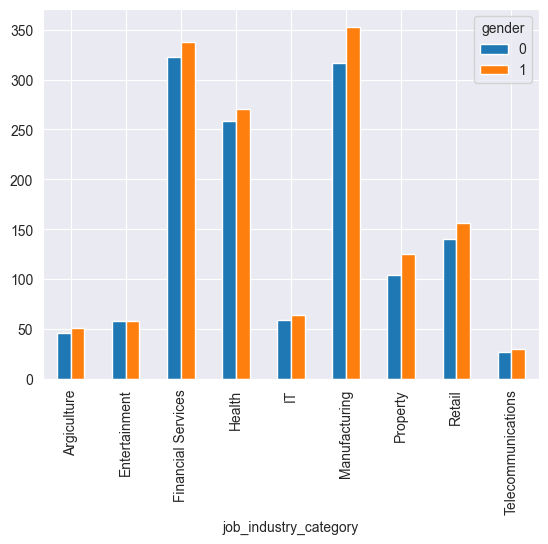

In [54]:
cust_demo_address.groupby('wealth_segment')['gender'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

cust_demo_address.groupby('age_level')['gender'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

cust_demo_address.groupby('job_industry_category')['gender'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

Thus gender is not an important feature for customers segment

<AxesSubplot: xlabel='owns_car'>

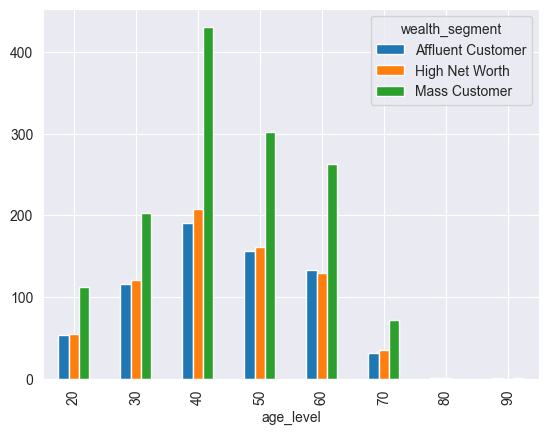

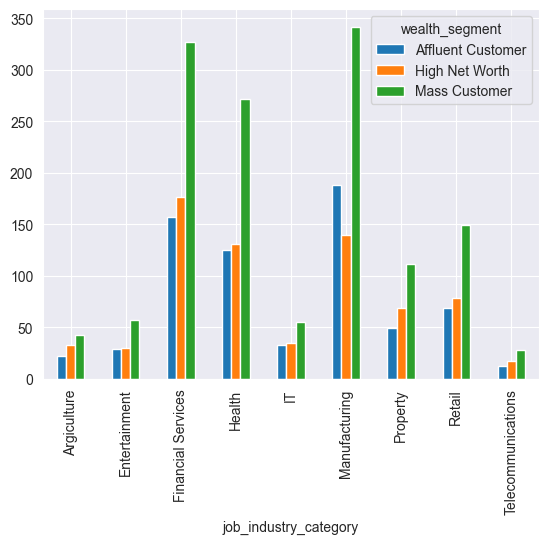

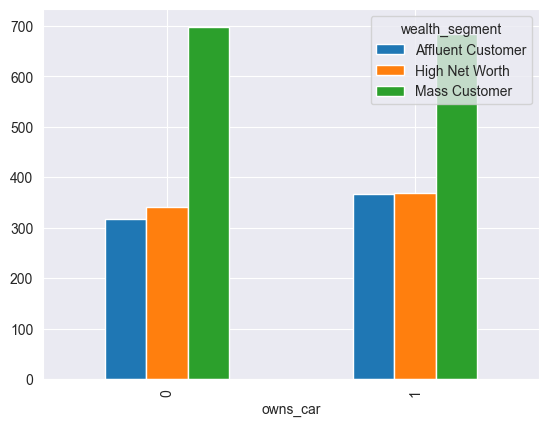

<AxesSubplot: xlabel='owns_car'>

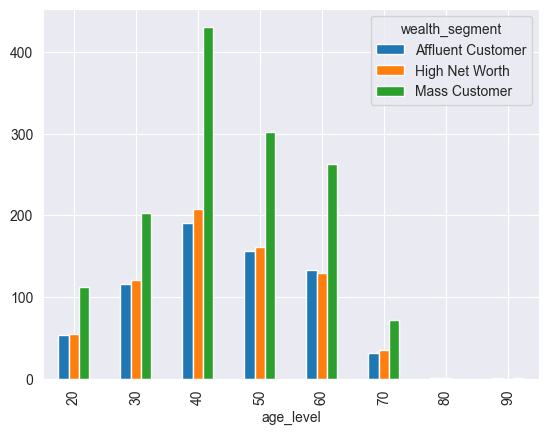

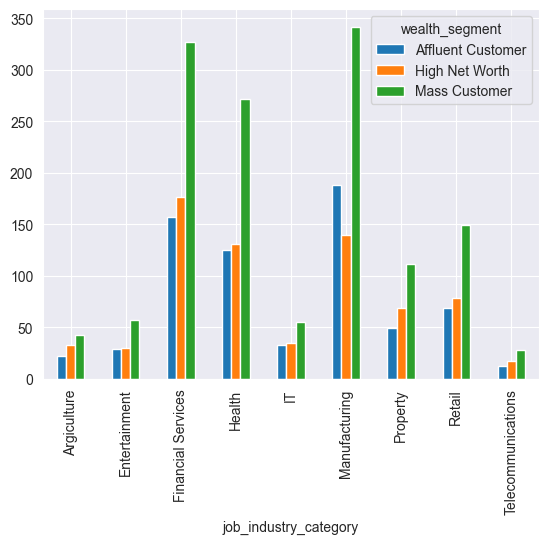

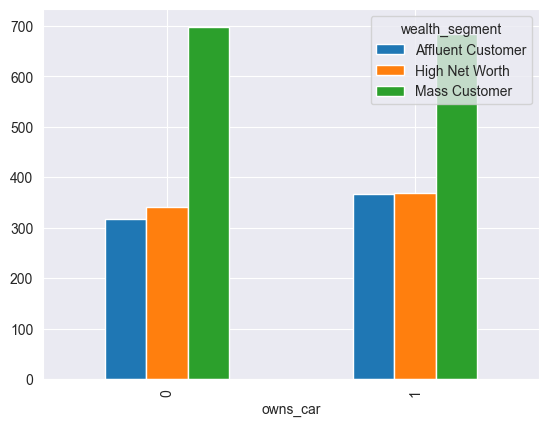

In [55]:
cust_demo_address.groupby('age_level')['wealth_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

cust_demo_address.groupby('job_industry_category')['wealth_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

cust_demo_address.groupby('owns_car')['wealth_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

<AxesSubplot: xlabel='state'>

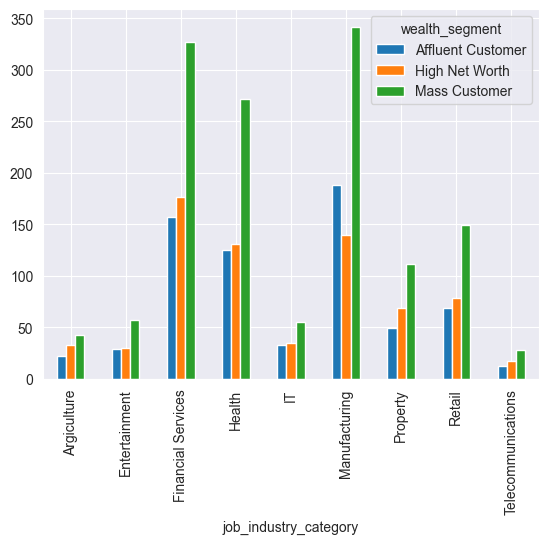

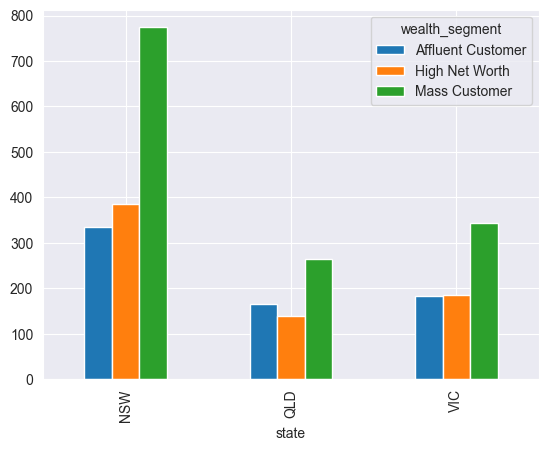

<AxesSubplot: xlabel='state'>

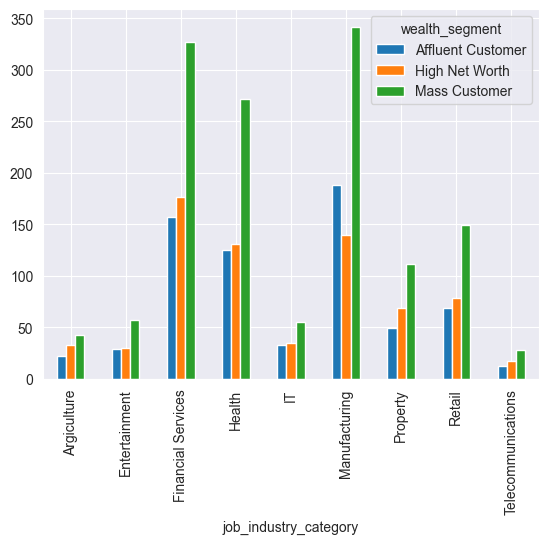

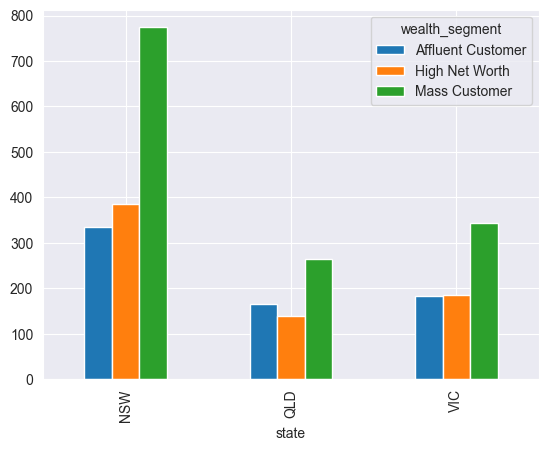

In [56]:
cust_demo_address.groupby('job_industry_category')['wealth_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

cust_demo_address.groupby('state')['wealth_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

In [63]:
customer_rfm = pd.merge(cust_demo_address, rfm, left_index=True, right_index=True)
print(customer_rfm.columns)
customer_rfm.head()
customer_rfm.to_excel("customer_rfm.xlsx")

Index(['customer_id', 'gender', 'Age', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'age_level', 'recency', 'frequency',
       'monetary', 'r_grade', 'f_grade', 'm_grade', 'rfm_grade',
       'customer_segment'],
      dtype='object')


<AxesSubplot: xlabel='state'>

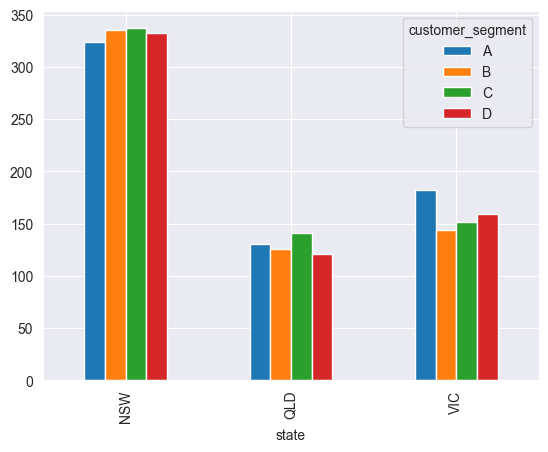

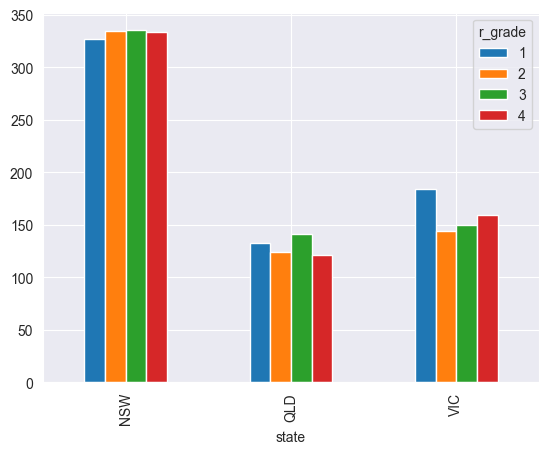

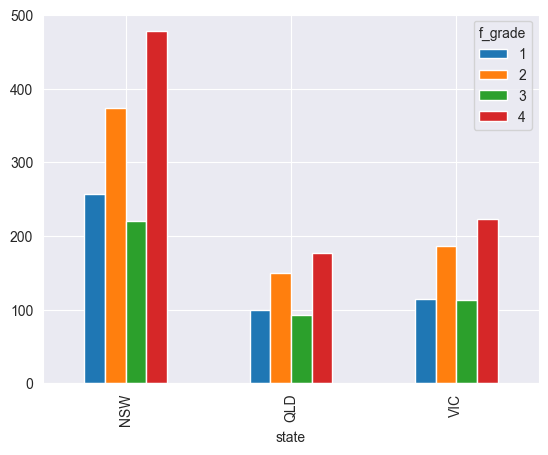

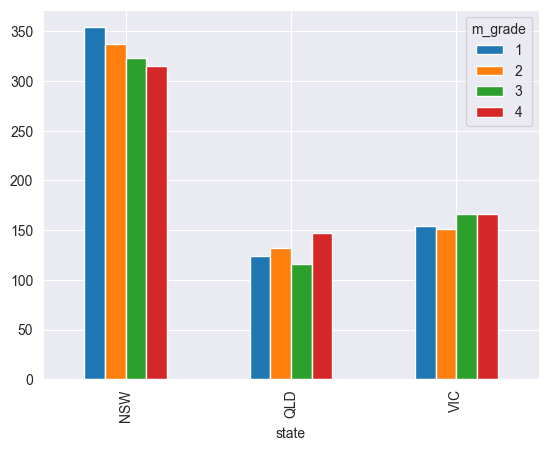

<AxesSubplot: xlabel='state'>

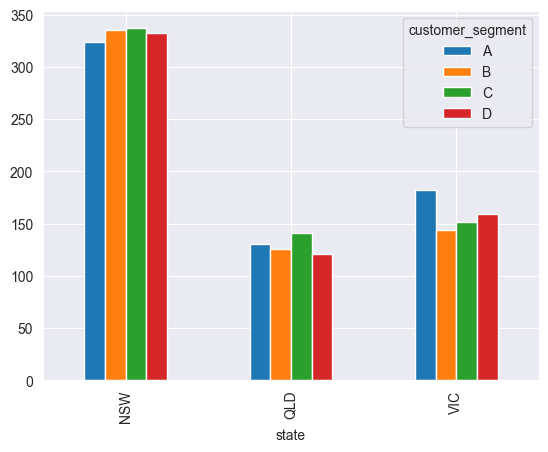

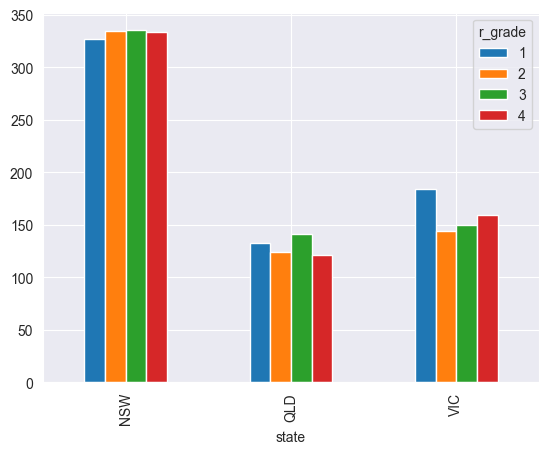

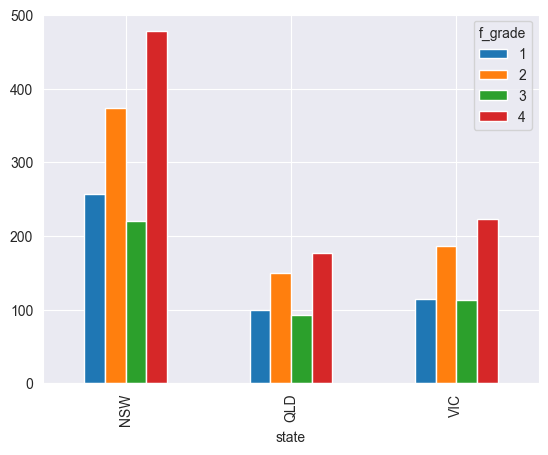

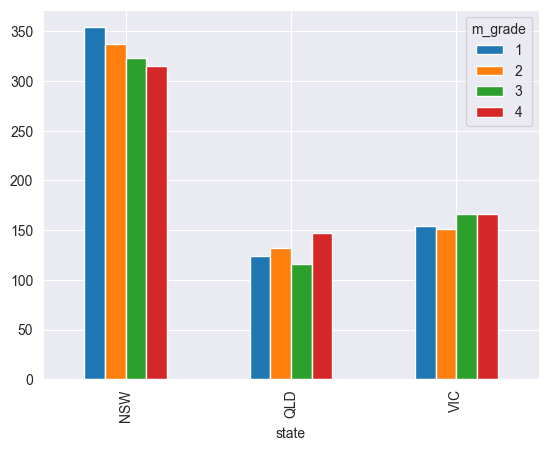

In [58]:
customer_rfm.groupby('state')['customer_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('state')['r_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('state')['f_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('state')['m_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

<AxesSubplot: xlabel='wealth_segment'>

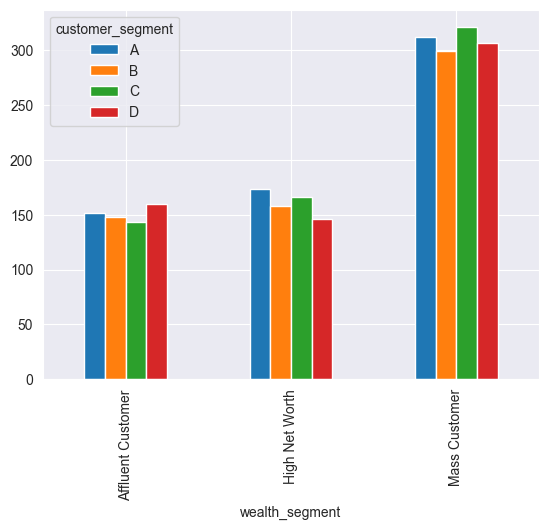

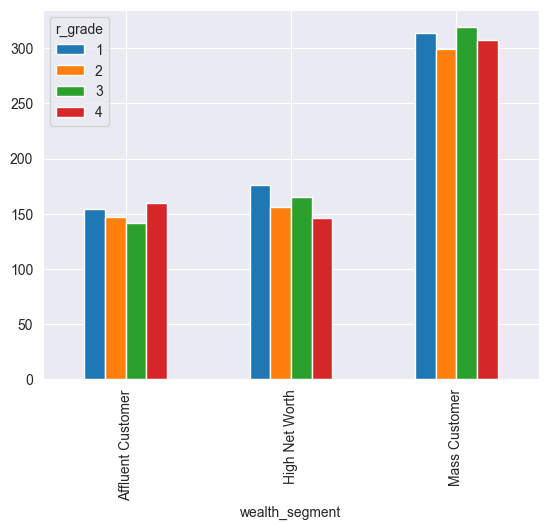

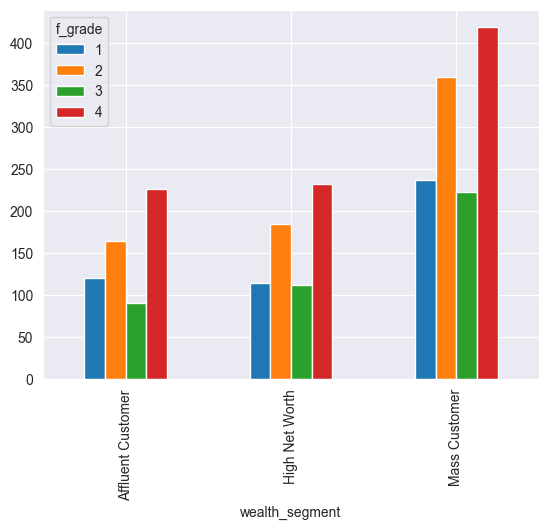

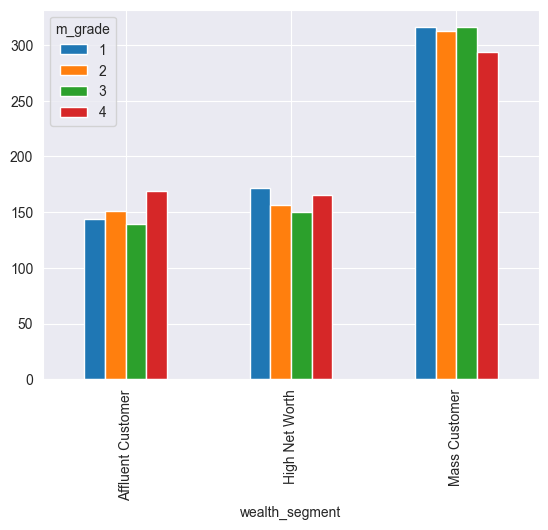

<AxesSubplot: xlabel='wealth_segment'>

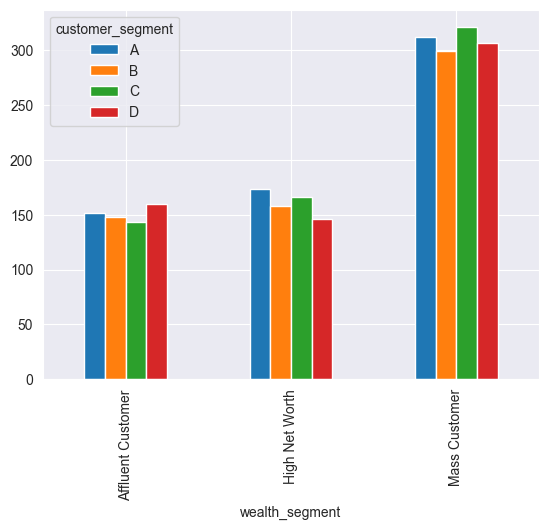

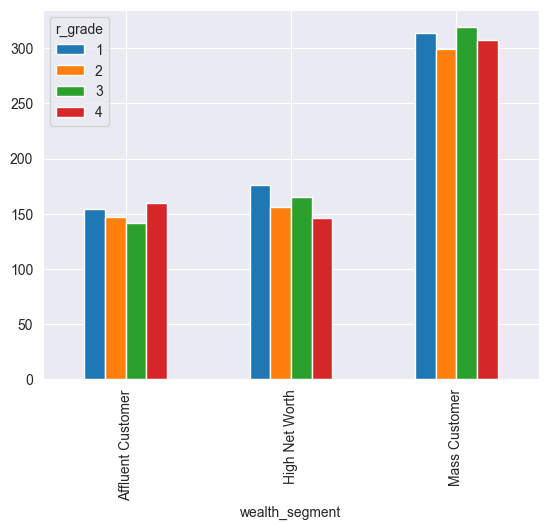

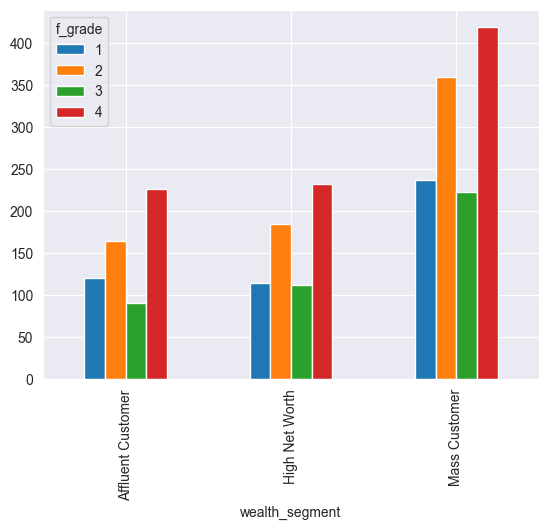

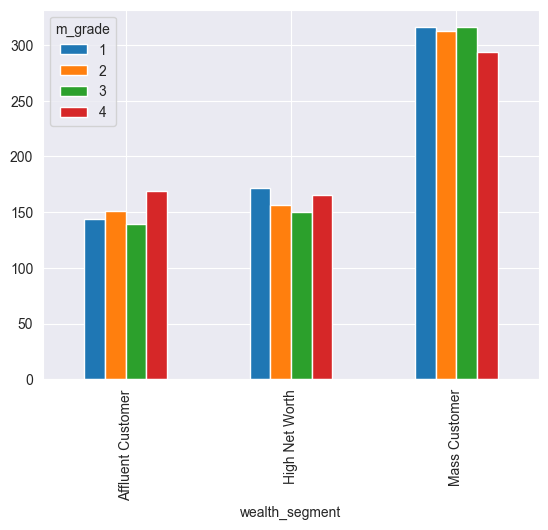

In [59]:
customer_rfm.groupby('wealth_segment')['customer_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('wealth_segment')['r_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('wealth_segment')['f_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('wealth_segment')['m_grade'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

<AxesSubplot: xlabel='job_industry_category'>

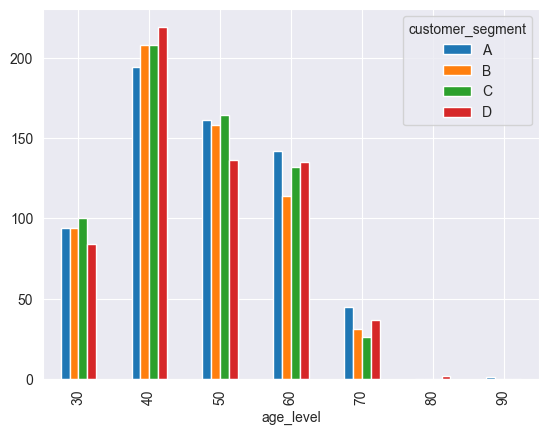

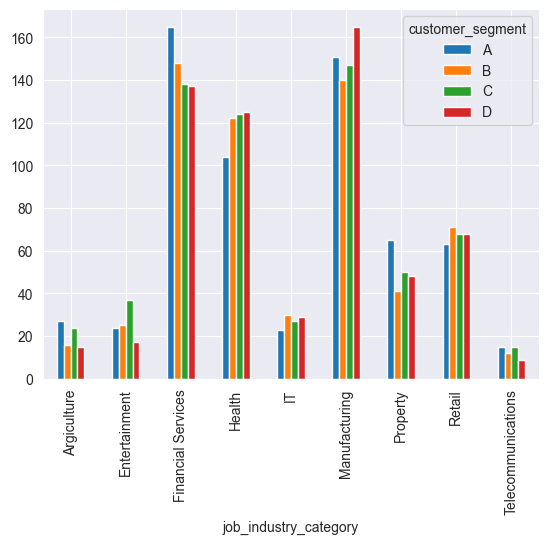

<AxesSubplot: xlabel='job_industry_category'>

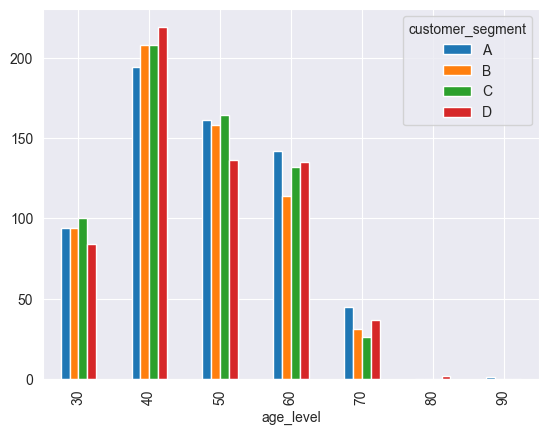

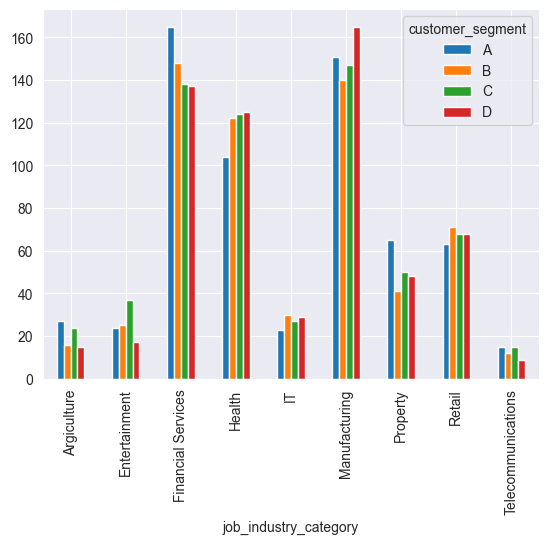

In [60]:
customer_rfm.groupby('age_level')['customer_segment'] \
    .value_counts().unstack(level=1).plot.bar(stacked=False)

customer_rfm.groupby('job_industry_category')['customer_segment'].value_counts().unstack(level=1).plot.bar(stacked=False)